# 	Programming Homework #2: 로지스틱 회귀
csv 파일을 통해 비행기 탑승 승객 리스트를 ID, Survival, Class, Gender, Age 순으로 수치화하여 데이터를 만드세요.

사이킷런을 사용해 로지스틱회귀를 실행하여 생존율 예측 모델을 만들고, 추정 확률과 결정 경계를 그림 4-23과 같이 출력하세요.

In [7]:
import pandas as pd
plane = pd.read_csv("plane.csv", encoding='utf-8')

In [8]:
plane

,ID,Survival,Class,Gender,Age
0,1,0,3,male,22.0
1,2,1,1,female,38.0
2,3,1,3,female,26.0
3,4,1,1,female,35.0
4,5,0,3,male,35.0
...,...,...,...,...,...
95,96,0,2,male,21.0
96,97,0,2,male,32.5
97,98,1,2,female,32.5
98,99,0,1,male,54.0


In [67]:
import numpy as np

X = (plane[['Gender']] == 'female').astype(np.int)   #female이면 1, male이면 0
y = plane['Survival'].values

<ipython-input-67-9e96bd8d7143>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = (plane[['Gender']] == 'female').astype(np.int)   #female이면 1, male이면 0


In [68]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

Text(0.5, 0, '1: female    0: male')

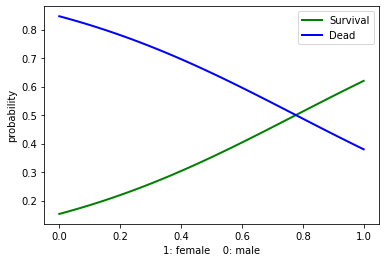

In [76]:
import matplotlib.pyplot as plt

#np.linspace(x, y, z): x~y범위의 균일한 점 z개로 구성된 벡터 생성,    reshape(-1, 1): 열 1개로 구성된 배열로 변경
X_new = np.linspace(0, 1, 100).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Survival")
plt.plot(X_new, y_proba[:, 0], "b-", linewidth=2, label="Dead")
plt.legend()
plt.ylabel("probability") 
plt.xlabel("1: female    0: male") 